Mapping + output list of authors/papers \\
email kod for 12/8 meeting (possible postpone) \\
report + editting done by finals week 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
output_df = pd.read_csv("/content/gdrive/MyDrive/Diversity Project Research/quantum/test-output/predictions.csv", index_col = False)
scopus_df = pd.read_csv("/content/gdrive/MyDrive/Diversity Project Research/quantum/test-scopus/predictions.csv", index_col = False)
nano_df = pd.read_csv("/content/gdrive/MyDrive/Diversity Project Research/nano/predictions.csv", index_col = False)
ids_df = pd.read_csv("/content/gdrive/MyDrive/Diversity Project Research/ids/predictions.csv", index_col = False)
cce_df = pd.read_csv("/content/gdrive/MyDrive/Diversity Project Research/cce/predictions.csv", index_col = False)

In [ ]:
def process(input):
  df = input.copy()
  df.drop(df.columns[0], axis=1, inplace=True)
  df[['Gender','Gender_Prob']] = df['Gender'].str.split(',', expand = True)
  df['Gender_Prob'] = df['Gender_Prob'].astype(int)
  df["ethn_confidence"] = df['A'].map(lambda x: 1 if x > 0.7 else (0.5 if x > 0.3 and x <= 0.7 else 0))
  df["gender_confidence"] = df['Gender_Prob'].map(lambda x: 1 if x > 70 else (0.5 if x > 30 and x <= 70 else 0))
  df["gender_"] = df['Gender'].map(lambda x: 1 if x == "female" else (0 if x == "male" else 0.5))
  # fig = plt.figure(figsize=(10,10))
  # axs1 = fig.add_subplot(211)
  # axs1.hist(df['A'],20)
  # axs1.title.set_text('Author-of-Color Histogram')
  # axs2 = fig.add_subplot(212)
  # axs2.hist(df['Gender_Prob'], 20)
  # axs2.title.set_text('GenderAPI Probabilities')
  return df

In [8]:
def process_plot(input):
  df = input.copy()
  df.drop(df.columns[0], axis=1, inplace=True)
  df[['Gender','Gender_Prob']] = df['Gender'].str.split(',', expand = True)
  df['Gender_Prob'] = df['Gender_Prob'].astype(int)
  fig = plt.figure(figsize=(10,10))
  axs1 = fig.add_subplot(211)
  axs1.hist(df['A'],20)
  axs1.title.set_text('Author-of-Color Histogram')
  axs2 = fig.add_subplot(212)
  axs2.hist(df['Gender_Prob'], 20)
  axs2.title.set_text('GenderAPI Probabilities')

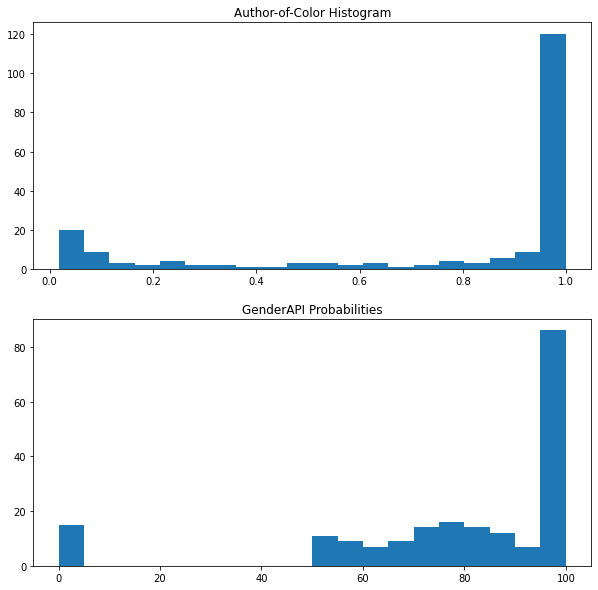

In [9]:
df = process_plot(output_df)

In [ ]:
df.dtypes

Unnamed: 0       int64
CitationKey     object
Author          object
Gender          object
W              float64
A              float64
GendCat         object
Gender_Prob      int64
dtype: object

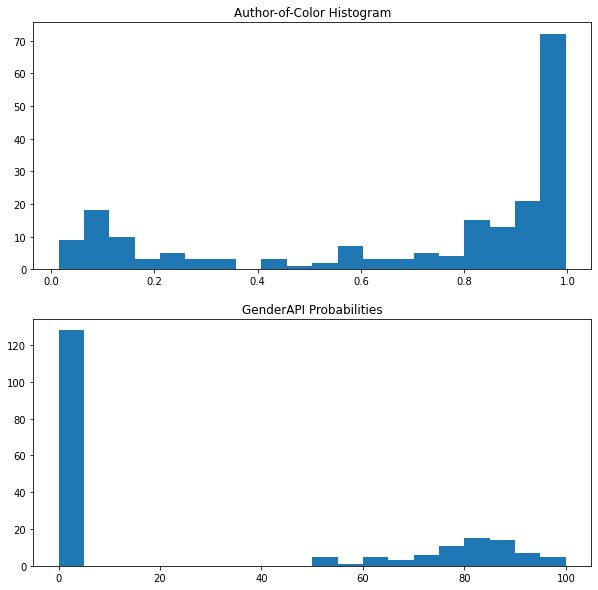

In [10]:
df = process_plot(scopus_df)

In [ ]:
output_df

,Unnamed: 0,CitationKey,Author,Gender,W,A,GendCat,Gender_Prob
0,0,kf1dd56k8rfqlg8jn2v7u,"Abhijit,Hazarika",male,0.014416,0.985584,NaN,100
1,1,kf1dd56k8rfqlg8jn2v7u,"Joseph,Luther",male,0.963529,0.036471,malemale,99
2,2,spg64k6n2uzf33rg599tp,"Amit,Munshi",male,0.185558,0.814442,NaN,99
3,3,spg64k6n2uzf33rg599tp,"Walajabad,Sampath",unknown,0.365591,0.634409,maleunknown,0
4,4,z39frgmu33lf5s1a3rdvi,"Athithan,Maheshwaran",male,0.268097,0.731903,NaN,80
...,...,...,...,...,...,...,...,...
195,195,1qtta2si6sf37kfbigls6,"Zhidong,Zhang",male,0.004820,0.995180,malemale,100
196,196,t3m9l59287vrv6nhqt6eb,"Zhiping,Hu",male,0.005263,0.994737,NaN,78
197,197,t3m9l59287vrv6nhqt6eb,"Yuxin,Leng",female,0.014443,0.985557,malefemale,66
198,198,al6c4r6e7o9qd84iiil3z,"nder,Gl",male,0.552362,0.447638,NaN,100


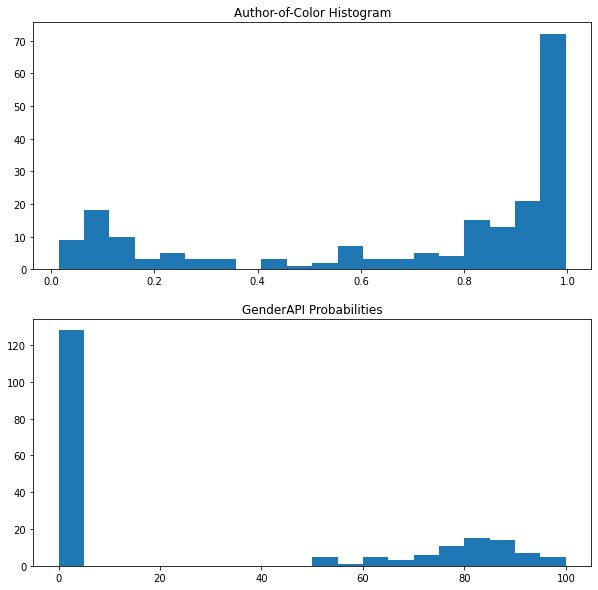

In [ ]:
df1 = process(scopus_df)

In [ ]:
nano_df = process(nano_df)

In [ ]:
nano_df.tail(20)

,CitationKey,Author,Gender,W,A,GendCat,Gender_Prob,ethn_confidence,gender_confidence,gender_
180,rhi68b7o4dutjmjf0l04r,"Yaodong,Li",male,0.016305,0.983695,NaN,100,1.0,1.0,0.0
181,rhi68b7o4dutjmjf0l04r,"Matthew,Fisher",male,0.963850,0.036150,malemale,100,0.0,1.0,0.0
182,6tpevbsn6gdps79n96nef,"Yaodong,Li",male,0.016305,0.983695,NaN,100,1.0,1.0,0.0
183,6tpevbsn6gdps79n96nef,"Matthew,Fisher",male,0.963850,0.036150,malemale,100,0.0,1.0,0.0
184,s2adjnm7nf1diro2vc95b,"Yuhui,Ma",male,0.056562,0.943439,NaN,52,1.0,0.5,0.0
185,s2adjnm7nf1diro2vc95b,"Wei,Huang",male,0.001534,0.998466,malemale,73,1.0,1.0,0.0
186,buu21h32rjfz7nbgaokzi,"Yunseong,Nam",male,0.010666,0.989334,NaN,89,1.0,1.0,0.0
187,buu21h32rjfz7nbgaokzi,"Dmitri,Maslov",male,0.963298,0.036702,malemale,99,0.0,1.0,0.0
188,0rhepqauc2dustl63tl8b,"Yuto,Ashida",male,0.126141,0.873859,NaN,100,1.0,1.0,0.0
189,0rhepqauc2dustl63tl8b,"Masahito,Ueda",male,0.692300,0.307700,malemale,100,0.5,1.0,0.0


In [ ]:
def export(name, df):
  processed_df = process(df)
  path = name + '-export.csv'
  processed_df.to_csv(path)

In [ ]:
export("quantum", output_df)

In [ ]:
export("nano", nano_df)
export("cce", cce_df)
export("ids", ids_df)